In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("./data/train.csv")
df['pickup_datetime']  = pd.to_datetime(df['pickup_datetime'])
df = df.drop(columns=["id", "vendor_id" , "dropoff_datetime", "passenger_count", "dropoff_latitude", 
                         "dropoff_longitude", "store_and_fwd_flag", "trip_duration"])
df['day'] = df['pickup_datetime'].dt.day_name()
df['hour'] = df['pickup_datetime'].dt.hour
df['hour'] = df['pickup_datetime'].dt.hour

In [3]:
df.shape[0]

1458644

In [4]:
df.dtypes

pickup_datetime     datetime64[ns]
pickup_longitude           float64
pickup_latitude            float64
day                         object
hour                         int64
dtype: object

In [5]:
df.head(5)

,pickup_datetime,pickup_longitude,pickup_latitude,day,hour
0,2016-03-14 17:24:55,-73.982155,40.767937,Monday,17
1,2016-06-12 00:43:35,-73.980415,40.738564,Sunday,0
2,2016-01-19 11:35:24,-73.979027,40.763939,Tuesday,11
3,2016-04-06 19:32:31,-74.010040,40.719971,Wednesday,19
4,2016-03-26 13:30:55,-73.973053,40.793209,Saturday,13


In [6]:
df['date'] = df['pickup_datetime'].map(lambda x: x.date())

In [7]:
# Create a Group by object using tripdate
grp_date = df.groupby('date')

# Compute number of trips by date and check out the result
trips_by_date = pd.DataFrame(grp_date.size(), columns=['num_trips'])

In [8]:
mean_trips = trips_by_date['num_trips'].mean()
tot_tripdates = trips_by_date['num_trips'].count()
num_days = (trips_by_date.index.max() - trips_by_date.index.min()).days + 1

print("The mean number of trips per day is {:.2f}. The mean is based on {} days."
      .format(mean_trips, tot_tripdates))
print("The beginning of the date range is {}.".format(trips_by_date.index.min()))
print("The end of the date range is {}.".format(trips_by_date.index.max()))

The mean number of trips per day is 8014.53. The mean is based on 182 days.
The beginning of the date range is 2016-01-01.
The end of the date range is 2016-06-30.


In [9]:
# Create a Group by object using tripdate
grp_hour = df.groupby('hour')

# Compute number of trips by date and check out the result
trips_by_hour = pd.DataFrame(grp_hour.size(), columns=['num_trips'])

In [11]:
mean_trips = trips_by_hour['num_trips'].mean()
tot_tripdates = trips_by_hour['num_trips'].count()
num_days = (trips_by_hour.index.max() - trips_by_hour.index.min())+ 1

print("The mean number of trips per hour is {:.2f}.".format(mean_trips))

The mean number of trips per hour is 60776.83.


In [23]:
df_mon = df.loc[df['day'] == "Monday"]
df_tues = df.loc[df['day'] == "Tuesday"]
df_wed = df.loc[df['day'] == "Wednesday"]
df_thurs = df.loc[df['day'] == "Thursday"]
df_fri = df.loc[df['day'] == "Friday"]
df_sat = df.loc[df['day'] == "Saturday"]
df_sun = df.loc[df['day'] == "Sunday"]

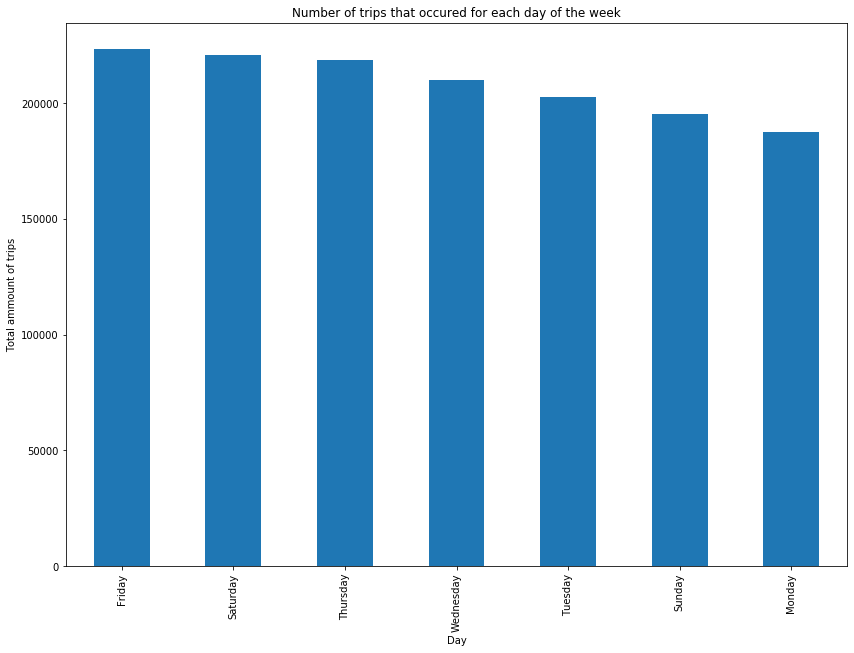

In [13]:
ax = df['day'].value_counts().plot(kind='bar',
                                    figsize=(14,10),
                                    title="Number of trips that occured for each day of the week")
ax.set_xlabel("Day")
ax.set_ylabel("Total ammount of trips")
ax.figure.savefig('./output/trip_occurance_day.pdf', dpi = 500)

Number of Trips that occured on a Monday

In [14]:
df_mon.shape[0]

187418

Number of trips that occured on a Friday

In [15]:
df_fri.shape[0]     

223533

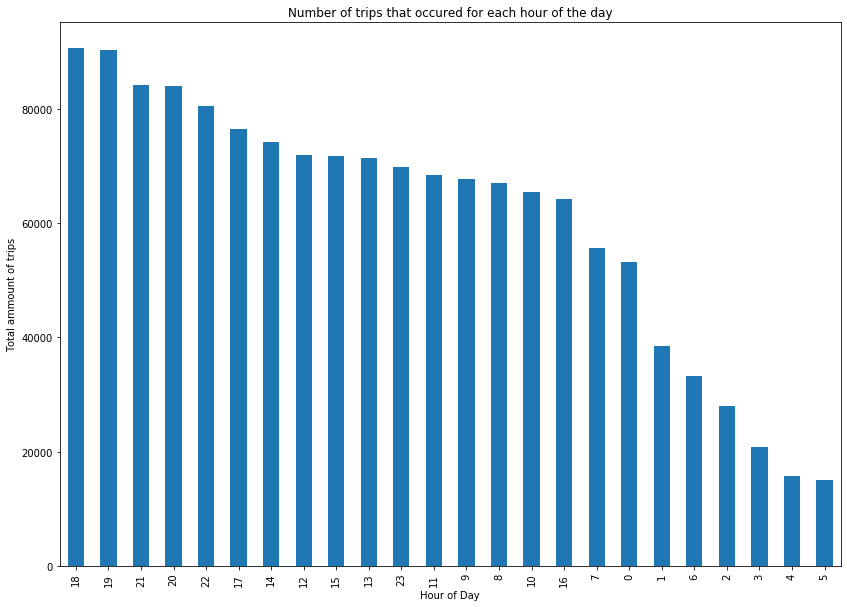

In [16]:
ax = df['hour'].value_counts().plot(kind='bar',
                                    figsize=(14,10),
                                    title="Number of trips that occured for each hour of the day")
ax.set_xlabel("Hour of Day")
ax.set_ylabel("Total ammount of trips")
ax.figure.savefig('./output/trip_occurance_hour.pdf', dpi=500)

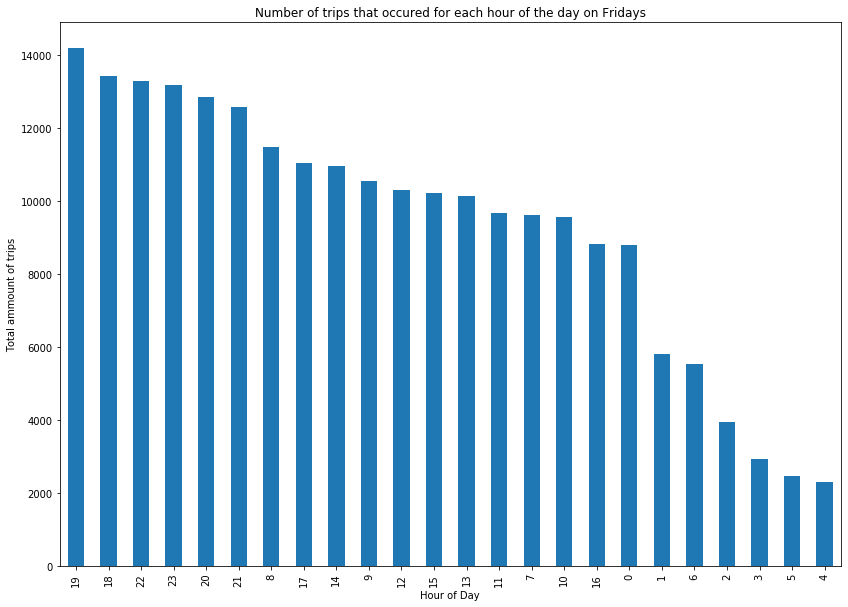

In [17]:
ax = df_fri['hour'].value_counts().plot(kind='bar',
                                    figsize=(14,10),
                                    title="Number of trips that occured for each hour of the day on Fridays")
ax.set_xlabel("Hour of Day")
ax.set_ylabel("Total ammount of trips")
ax.figure.savefig('./output/fri_occurance_hour.pdf', dpi = 500)


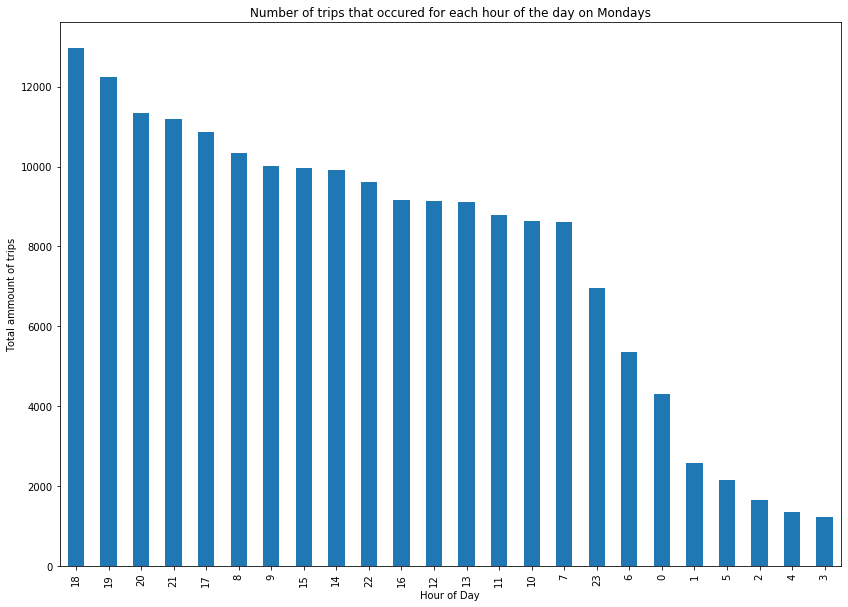

In [18]:
ax = df_mon['hour'].value_counts().plot(kind='bar',
                                    figsize=(14,10),
                                    title="Number of trips that occured for each hour of the day on Mondays")
ax.set_xlabel("Hour of Day")
ax.set_ylabel("Total ammount of trips")
ax.figure.savefig('./output/mon_occurance_hour.pdf', dpi = 500)

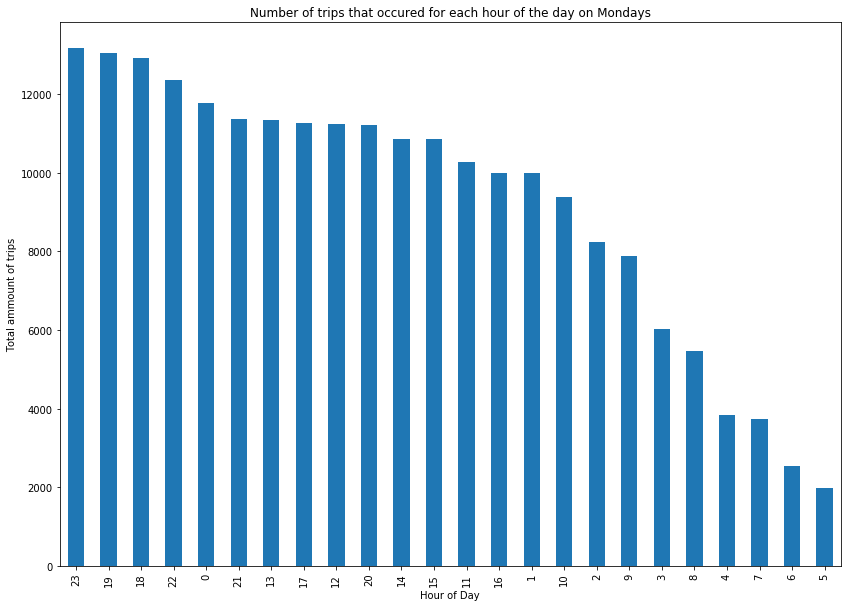

In [27]:
ax = df_sat['hour'].value_counts().plot(kind='bar',
                                    figsize=(14,10),
                                    title="Number of trips that occured for each hour of the day on Mondays")
ax.set_xlabel("Hour of Day")
ax.set_ylabel("Total ammount of trips")
ax.figure.savefig('./output/sat_occurance_hour.pdf', dpi = 500)

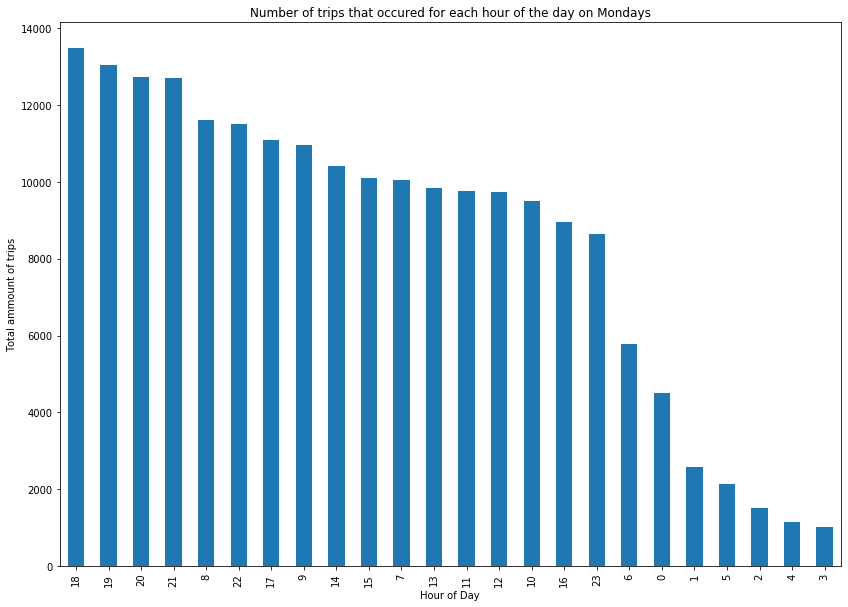

In [28]:
ax = df_tues['hour'].value_counts().plot(kind='bar',
                                    figsize=(14,10),
                                    title="Number of trips that occured for each hour of the day on Mondays")
ax.set_xlabel("Hour of Day")
ax.set_ylabel("Total ammount of trips")
ax.figure.savefig('./output/tues_occurance_hour.pdf', dpi = 500)